Fera Febriana/4101422111


#1. Eksplorasi Awal


In [1576]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1577]:
#pemanggilan data
data = pd.read_csv("Titanic.csv")

##a. Berapa jumlah total penumpang dalam data

In [1578]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1579]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [1580]:
data.shape

(891, 12)

In [1581]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Berdasarkan output di atas, dapat disimpulkan bahwa dataset tersebut memiliki total 12 kolom, dengan jumlah maksimal tiap kolom sebanyak 891 baris. Artinya jumlah total penumpang pada data adalah 891 penumpang.

##b. Berapa jumlah penumpang yang selamat dan tidak selamat? Tampilkan dalam bentuk tabel dan grafik

In [1582]:
#Asumsi: kolom 'Survived' -> 1 = selamat, 0 = tidak selamat
survival_counts = data['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'})

In [1583]:
#Tampilkan dalam bentuk tabel
print("\nJumlah Penumpang Selamat vs Tidak Selamat:")
print(survival_counts.to_frame(name='Jumlah Penumpang'))


Jumlah Penumpang Selamat vs Tidak Selamat:
               Jumlah Penumpang
Survived                       
Tidak Selamat               549
Selamat                     342


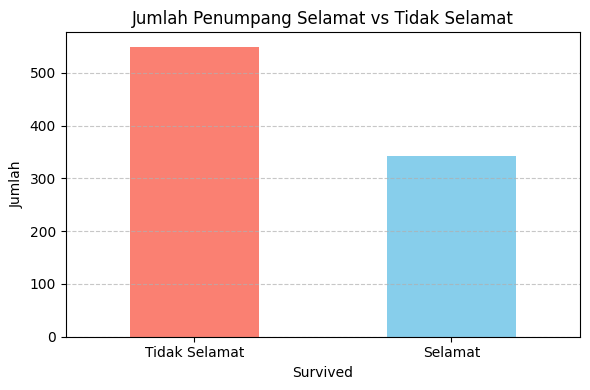

In [1584]:
# Tampilkan dalam bentuk grafik
plt.figure(figsize=(6, 4))
survival_counts.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Jumlah Penumpang Selamat vs Tidak Selamat')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##c. Berapa rata-rata umur penumpang? dan siapa penumpang termuda dan tertua


In [1585]:
#melihat statistika deskriptif
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1586]:
# Penumpang termuda
penumpang_termuda = data[data['Age'] == data['Age'].min()]
print("\nPenumpang termuda:")
print(penumpang_termuda[['Name', 'Age']])

# Penumpang tertua
penumpang_tertua = data[data['Age'] == data['Age'].max()]
print("\nPenumpang tertua:")
print(penumpang_tertua[['Name', 'Age']])


Penumpang termuda:
                                Name   Age
803  Thomas, Master. Assad Alexander  0.42

Penumpang tertua:
                                     Name   Age
630  Barkworth, Mr. Algernon Henry Wilson  80.0


Berdasarkan output statistika deskriptif diperoleh rata-rata umur penumpang adalah 29.699118 tahun atau 29,7 tahun.

Penumpang dengan umur termuda yaitu umur 0,42 tahun bernama Thomas, Master. Assad Alexander dan umur tertua yaitu 80 tahun bernama Barkworth, Mr. Algernon Henry Wilson.

##d. Berapakah jumlah penumpang berdasarkan jenis kelamin? siapa yang lebih banyak? visualisasikan.


In [1587]:
data['Sex'].value_counts()

,count
Sex,
male,577
female,314


Penumpang laki-laki berjumlah 577 orang dan penumpang perempuan berjumlah 314 orang. Maka, pada data tersebut penumpang yang paling banyak adalah penumpang yang berjenis kelamin laki-laki yaitu sebanyak 577 orang.


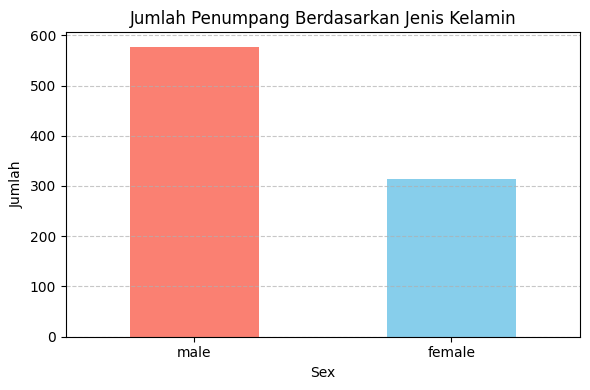

In [1588]:
# Tampilkan dalam bentuk grafik
survival_counts = data['Sex'].value_counts()
plt.figure(figsize=(6, 4))
survival_counts.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##e. Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang berada di kelas 1? Visualisasikan

In [1589]:
data['Pclass'].value_counts().sort_index()

,count
Pclass,
1,216
2,184
3,491


In [1590]:
# Presentase penumpang kelas 1
# Presentase penumpang kelas 1
pclass_counts = data['Pclass'].value_counts().sort_index() # Assign the result to pclass_counts
persentase_kelas_1 = (pclass_counts[1] / len(data)) * 100 # Change df to data
print(f"\nPersentase penumpang di kelas 1: {persentase_kelas_1:.2f}%")


Persentase penumpang di kelas 1: 24.24%


Jadi, persentase penumpang di kelas 1 yaitu 24,24% dengan jumlah 216 orang dari total penumpang 891 orang.

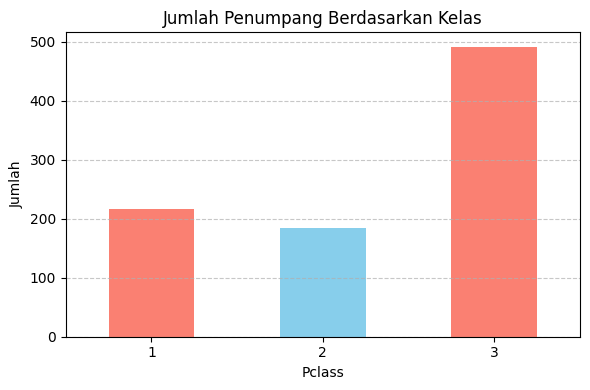

In [1591]:
# Tampilkan dalam bentuk grafik
survival_counts = data['Pclass'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
survival_counts.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Jumlah Penumpang Berdasarkan Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#2. Preprocessing


##a. Apakah terdapat missing value pada data tersebut?

In [1592]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 12 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 891 baris. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris < 891, maka akan dilakukan proses identifikasi lebih lanjut.

In [1593]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [1594]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Berdasarkan output summarize tersebut, diperoleh bahwa dalam dataset tersebut terdapat missing value. Adapun kolom yang mengandung Missing Values (blanks/ N/A (Python : nan atau NaN)) adalah Age, Cabin, dan Embarked. Jumlah missing value pada kolom age adalah 177, pada cabin adalah 687, dan pada kolom embarked adalah 2.

In [1595]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

np.int64(866)

##b. Jika ya, apa yang anda lakukan?


Karena dalam dataset tersebut mengandung missing value maka kasus ini akan ditangani terlebih dahulu sebelum model dapat digunakan.

Akan dilakukan pembersihan data pada kolom Nama, tiket, cabin, dan PassangerID. Hal ini dilakukan karena kolom-kolom berikut tidak

###- Age

In [1596]:
#melihat isi dalam kolom duration
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [1597]:
#jumlah missing value
np.sum(data['Age'].isnull())

np.int64(177)

Berdasarkan output tersebut, dapat dilihat bahwa kolom tersebut mengandung detail Missing Values : 'nan'. Pada kasus ini, masing-masing Missing Values tersebut akan diganti dengan rata-rata dari harga keseluruhan data, karena diasumsikan data berdistribusi normal.

In [1598]:
#mengisi missing value
data['Age']=data['Age'].fillna(data['Age'].mean())

In [1599]:
#jumlah missing value
np.sum(data['Age'].isnull())

np.int64(0)

In [1600]:
#melihat isi dalam kolom
data['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

###- Cabin

In [1601]:
#melihat isi dalam kolom
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [1602]:
#jumlah missing value
np.sum(data['Cabin'].isnull())

np.int64(687)

Berdasarkan output tersebut, dapat dilihat bahwa kolom tersebut mengandung detail Missing Values : 'nan'. Pada kasus ini, karena missing value terlalu banyak yaitu 687, maka untuk lebih amannya data ini akan dihapus.

In [1603]:
# Hapus kolom Cabin
data.drop(columns='Cabin', inplace=True)


### - Embarked

In [1604]:
#melihat isi dalam kolom
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1605]:
#jumlah missing value
np.sum(data['Embarked'].isnull())

np.int64(2)

Berdasarkan output tersebut, dapat dilihat bahwa kolom tersebut mengandung detail Missing Values : 'nan'. Pada kasus ini, masing-masing Missing Values tersebut akan diganti dengan mode dari Embarked. Hal ini karena Embarked adalah data kategorikal (bukan numerik), sehingga tidak bisa diisi dengan mean atau median seperti kolom numerik. Sehingga dalam kasus ini akan digunakan mode sebagai salah satu cara menangani missing values pada kolom Embarked.

In [1606]:
from scipy.stats import mode
data['Embarked'].mode()

,Embarked
0,S


In [1607]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [1608]:
#jumlah missing value
np.sum(data['Embarked'].isnull())

np.int64(0)

In [1609]:
# memastikan kembali bahwa data sudah tidak memiliki missing value
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


##c. Apakah terdapat outlier pada data tersebut? Jelaskan apa itu outlier

In [1610]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


- **Boxplot**

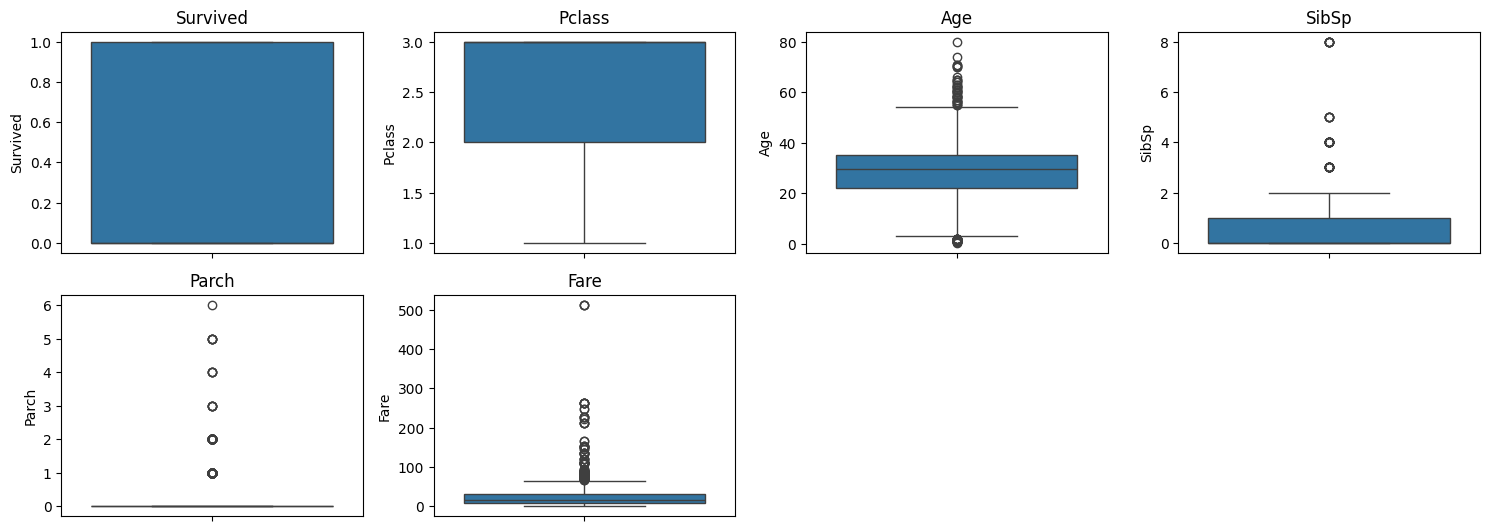

In [1611]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

- **IQR**

In [1612]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

Survived: 0 outliers
Pclass: 0 outliers
Age: 66 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers


Pada dataset tersebut terdapat outlier pada kolom Age = 66, SibSp= 46, Parch= 213 dan Fare= 116.

Outlier biasa disebut juga sebagai pencilan. Outlier merupakan nilai dari suatu data yang menyimpang secara signifikan dari nilai lainnya dalam suatu kelompok data.

##d. Apakah oulier pada data tersebut perlu di atasi serta bagaimana cara mengatasinya?

Outlier pada data tersebut perlu di atasi karena jika tidak di atasi dapat menyebabkan analisis-analisis menggunakan statistik standar menjadi bias dan membuat informasi yang diperoleh menjadi tidak akurat atau menyesatkan.

Penanganan outlier pada dataset ini akan menggunakan metode Winsorizing (Mengganti outlier dengan Batar IQR).

In [1613]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

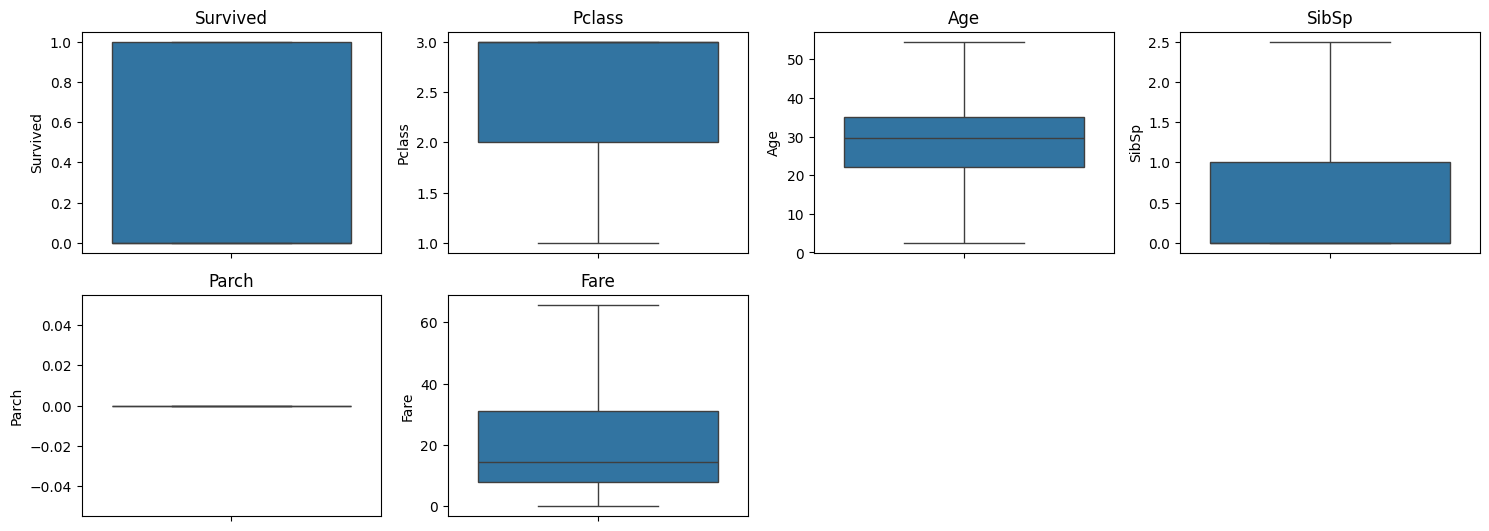

In [1614]:
#cek boxplot lagi

num_cols = ['Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##e. Jika dibutuhkan silakan lakukan transformasi/standarisasi/scalling terhadap data tersebut.

Data perlu dilakukan transformasi dan scalling. Pada Age dan Fare akan dilakukan scaling, sedangkan pada Sex dan Embarked akan dilakukan transformasi yaitu mengubah bentuk teks/string ke dalam bentuk numerik

In [1615]:
#Membersihkan data dengan menghapus kolom yang tidak relevan
data=data.drop(['PassengerId','Name','Ticket'], axis=1)
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.000000,1.0,0.0,7.2500,S
1,1.0,1.0,female,38.000000,1.0,0.0,65.6344,C
2,1.0,3.0,female,26.000000,0.0,0.0,7.9250,S
3,1.0,1.0,female,35.000000,1.0,0.0,53.1000,S
4,0.0,3.0,male,35.000000,0.0,0.0,8.0500,S
5,0.0,3.0,male,29.699118,0.0,0.0,8.4583,Q
6,0.0,1.0,male,54.000000,0.0,0.0,51.8625,S
7,0.0,3.0,male,2.500000,2.5,0.0,21.0750,S
8,1.0,3.0,female,27.000000,0.0,0.0,11.1333,S
9,1.0,2.0,female,14.000000,1.0,0.0,30.0708,C


In [1616]:
#Doing Feature Scaling to standardize the independent features present in the data in a fixed range
data.Age = (data.Age-min(data.Age))/(max(data.Age)-min(data.Age))
data.Fare = (data.Fare-min(data.Fare))/(max(data.Fare)-min(data.Fare))
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.0,891.000000
mean,0.383838,2.308642,0.516862,0.426487,0.0,0.366375
std,0.486592,0.836071,0.231962,0.708246,0.0,0.312056
min,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,2.000000,0.375000,0.000000,0.0,0.120522
50%,0.000000,3.000000,0.523060,0.000000,0.0,0.220223
75%,1.000000,3.000000,0.625000,1.000000,0.0,0.472313
max,1.000000,3.000000,1.000000,2.500000,0.0,1.000000


In [1617]:
#melihat isi dalam kolom
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [1618]:
#melihat isi dalam kolom
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [1619]:
#Mengonversi fitur kategori 'Sex' dan 'Embarked' menjadi nilai numerik 0 & 1
data.Sex=data.Sex.map({'female':0, 'male':1})
data.Embarked=data.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1,0.375000,1.0,0.0,0.110460,0
1,1.0,1.0,0,0.682692,1.0,0.0,1.000000,1
2,1.0,3.0,0,0.451923,0.0,0.0,0.120745,0
3,1.0,1.0,0,0.625000,1.0,0.0,0.809027,0
4,0.0,3.0,1,0.625000,0.0,0.0,0.122649,0


#3. Modelling

##a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut.

In [1620]:
#memisahkan data menjadi variabel x dan y
X=data.drop(['Survived'], axis=1)
y=data['Survived']

In [1621]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.model_selection import train_test_split: Ini adalah baris yang mengimpor fungsi train_test_split dari pustaka Scikit-Learn. Fungsi ini memungkinkan untuk dengan mudah membagi dataset menjadi bagian training dan testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0): Ini adalah pemanggilan fungsi train_test_split. Parameter yang digunakan adalah sebagai berikut:

X: Merupakan variabel yang berisi fitur atau atribut-atribut dari dataset.(ingat X besar) y: Merupakan variabel yang berisi target atau label dari dataset. (ingat y kecil) test_size=0.2: Parameter ini menentukan proporsi dari dataset yang akan dialokasikan untuk testing. Dalam kasus ini, 0.2 berarti 20% dari data akan menjadi data testing. random_state=0: Parameter ini menentukan seed atau nilai awal untuk generator angka acak yang digunakan dalam pembagian data. Ini berguna untuk memastikan bahwa pembagian data ini dapat direproduksi secara konsisten. Jika nilai ini tetap, pembagian data akan sama setiap kali kode ini dijalankan.

Hasil dari fungsi train_test_split adalah empat keluaran:

X_train: Data training untuk fitur-fitur. X_test: Data testing untuk fitur-fitur. y_train: Data training untuk target atau label. y_test: Data testing untuk target atau label. Dengan memisahkan dataset menjadi empat bagian ini, X_train dan y_train digunakan untuk melatih model, sementara X_test dan y_test digunakan untuk menguji performa model yang telah dilatih.

Alasan diperlukannya membagi data tersebut yaitu membantu dalam mengevaluasi seberapa baik model yang dihasilkan mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya.

##b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?

Pembagian antara data training dan data testing pada kasus ini adalah 80-20, dimana sekitar 80% dari data digunakan untuk training dan sisanya yaitu 20% digunakan untuk testing.

Dataset ini terdiri dari banyak baris 891 data. Dengan menggunakan proporsi 80-20, maka banyaknya data training yaitu 712 data dan data testing yaitu 179 data. Hal ini memberikan data training cukup contoh untuk menemukan pola yang kuat dan memberikan data testing cukup banyak untuk mengukur performa model dengan akurat.

##c. Buatkan model klasifikasi dari 3 algoritma yang berbeda. Jelaskan masing-masing model dan cara kerjanya.

###Naive Bayes

In [1622]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

GaussianNB ➔ algoritma Naive Bayes untuk data numerik (Gaussian artinya asumsi data berdistribusi normal).

In [1623]:
# data train menggunakan Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

Ini adalah untuk melatih model.
X adalah fitur-fitur input (contoh: Age, Fare, Pclass, dll).

y adalah label/target (Survived = 0 atau 1).

Saat .fit(), yang terjadi adalah:
Model menghitung prior probabilities untuk setiap kelas (berapa banyak yang selamat vs tidak selamat).

Model menghitung mean dan variance untuk setiap fitur berdasarkan masing-masing kelas.

Menyimpan semua informasi ini sebagai aturan dasar untuk prediksi nanti.

Setelah .fit(), maka model sudah belajar dari data training dan siang untuk memprediksi data baru yang belum pernah dia lihat.


In [1624]:
# menghitung akurasi data train
nb.score(X_train, y_train)

0.7626404494382022

In [1625]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [1626]:
from sklearn.metrics import accuracy_score # Import the accuracy_score function

for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.7765


###KNN

In [1627]:
# data train menggunakan KNN dengan Neighbors=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

KNeighborsClassifier adalah algoritma yang digunakan untuk klasifikasi berdasarkan kedekatan titik data dengan titik data lainnya.

Parameter n_neighbors=5 menunjukkan bahwa model akan mempertimbangkan 5 tetangga terdekat untuk menentukan kelas dari suatu data yang baru.

Secara sederhananya, KNN akan mencari 5 data terdekat dari titik data yang ingin diprediksi, kemudian memilih kelas mayoritas dari 5 tetangga tersebut sebagai prediksi.

X_train adalah data fitur yang digunakan untuk melatih model, sedangkan y_train adalah label kelas yang sesuai dengan data fitur tersebut.

Fungsi fit() digunakan untuk melatih model KNN dengan data pelatihan yang disediakan. Model ini akan "belajar" bagaimana cara mengklasifikasikan data berdasarkan pola yang ditemukan dalam data pelatihan.

In [1628]:
knn_preds = knn_model.predict(X_test)

X_test adalah data fitur yang belum digunakan dalam pelatihan model. Ini adalah data yang ingin diprediksi kelasnya. Biasanya, data uji digunakan untuk mengevaluasi kinerja model setelah dilatih.

Fungsi predict() digunakan untuk menghasilkan prediksi berdasarkan model yang sudah dilatih. Dalam hal ini, model KNN akan memeriksa tetangga terdekat dari setiap contoh di X_test, dan memilih kelas mayoritas di antara tetangga-tetangga tersebut sebagai prediksi untuk data tersebut.

knn_preds akan berisi hasil prediksi dari model KNN untuk setiap contoh data yang ada di X_test. Hasil ini berupa array atau list dari kelas-kelas yang diprediksi oleh model untuk setiap data uji.

In [1629]:
# menghitung akurasi data train
knn_acc = accuracy_score(y_test, knn_preds)
print("Akurasi KNN:", knn_acc)

Akurasi KNN: 0.8100558659217877


###Neural Network

In [1630]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

In [1631]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1, 'max_iter': 100}


Tentukan Parameter yang Ingin diuji: parameters adalah kamus yang berisi parameter-parameter yang ingin diuji. Pada contoh ini, parameter yang diuji meliputi hidden_layer_sizes (berbagai kombinasi jumlah dan ukuran hidden layers), learning_rate_init (berbagai tingkat pembelajaran awal), dan max_iter (berbagai jumlah iterasi).

Inisialisasi Model: MLPClassifier() digunakan untuk membuat model Neural Network Multi-Layer Perceptron (MLP) dengan parameter default.

Untuk memastikan bahwa hasil dari GridSearchCV konsisten setiap kali dijalankan, kamu bisa menambahkan argumen random_state pada GridSearchCV dan MLPClassifier. Penggunaan random_state ini akan memastikan bahwa inisialisasi yang melibatkan keputusan acak (seperti pembagian data menjadi lipatan validasi silang atau inisialisasi parameter awal pada Neural Network) dilakukan secara konsisten dalam setiap percobaan.Penting untuk dicatat bahwa pilihan nilai random_state tidak harus spesifik pada angka 100; angka lainnya juga dapat digunakan, asalkan nilai random_state yang sama digunakan dalam kondisi yang sama untuk memastikan konsistensi hasil saat menjalankan kode yang menggunakan random state.

Inisialisasi GridSearchCV: GridSearchCV digunakan untuk melakukan pencarian parameter terbaik dengan memanfaatkan cross-validation. cv=5 menunjukkan bahwa validasi silang dilakukan dengan 5 lipatan (5-fold cross-validation).

Pencarian Grid pada Data Training: grid_search.fit(X, y) melakukan pencarian parameter terbaik dengan memanfaatkan data training (X adalah fitur-fitur, y adalah target/label).

GridSearchCV akan mengevaluasi semua kombinasi parameter yang mungkin dari parameters yang telah ditentukan dan akan melakukan pelatihan serta evaluasi model pada setiap kombinasi tersebut. Tujuan utamanya adalah untuk menemukan kombinasi parameter yang menghasilkan model dengan performa terbaik berdasarkan metrik evaluasi yang dipilih (misalnya, akurasi, presisi, atau recall).

Setelah proses pencarian selesai, parameter terbaik dapat diakses melalui atribut best_params_ dari objek grid_search. Atribut ini akan menampilkan kombinasi parameter terbaik yang diidentifikasi selama pencarian grid.

In [1632]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

Kode yang disediakan menggunakan MLPClassifier dari library Scikit-Learn untuk membuat model Neural Network berbasis Multi-Layer Perceptron (MLP) dengan parameter tertentu dan melatihnya pada data training.

Dalam kasus ini, model MLPClassifier dibuat dengan parameter-parameter tertentu yang telah ditentukan secara manual. Parameter-parameter ini adalah:

hidden_layer_sizes=(50,): Ini adalah tuple yang menunjukkan arsitektur dari jaringan saraf. (50,) berarti terdapat satu hidden layersberisi 50 neuron.

learning_rate_init=0.1: Parameter ini adalah tingkat pembelajaran awal. Ini menunjukkan seberapa besar model akan menyesuaikan bobotnya berdasarkan kesalahan pada setiap iterasi.

max_iter=100: Parameter ini menunjukkan jumlah maksimum iterasi yang akan dilakukan saat melatih model. Ini mengontrol seberapa banyak iterasi atau epoch yang akan dilakukan selama proses pelatihan.

In [1633]:
y_pred = clf.predict(X_test)

In [1634]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.821

Output 0.821 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.804 berarti bahwa model berhasil memprediksi dengan benar sekitar 80,4% dari semua sampel pada data uji (y_test) yang telah digunakan.

##d. Berapa nilai evaluasi dari masing-masing model pada data uji? Apa arti masing-masing metrik evaluasi tersebut?

In [1635]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Import GaussianNB
from sklearn.neural_network import MLPClassifier # Import MLPClassifier


# Assuming X_train, X_test, y_train, y_test are defined from your train_test_split

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)  # Generate predictions for KNN

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)  # Generate predictions for Naive Bayes

# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100) # You might need to adjust parameters
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)  # Generate predictions for Neural Network

# Evaluasi untuk Naive Bayes
print("Evaluasi Naive Bayes:\n")
print(classification_report(y_test, y_pred_nb))

# Evaluasi untuk KNN
print("Evaluasi KNN:\n")
print(classification_report(y_test, y_pred_knn))


# Evaluasi untuk Neural Network
print("Evaluasi Neural Network:\n")
print(classification_report(y_test, y_pred_nn))

Evaluasi Naive Bayes:

              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       110
         1.0       0.69      0.77      0.73        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Evaluasi KNN:

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       110
         1.0       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Evaluasi Neural Network:

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       110
         1.0       0.82      0.68      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted a

Hasil dari laporan klasifikasi tersebut memberikan ringkasan performa model Naive Bayes, KNN, dan Neural Network pada data uji (Titanic) dengan menggunakan berbagai metrik evaluasi seperti precision, recall, dan f1-score. Berikut adalah interpretasi dari setiap metrik yang tercantum dalam laporan:

Precision:

- Pada model Naive Bayes

 0 (Kelas Negatif): Dari semua prediksi yang dilakukan sebagai kelas negatif, sekitar 84% di antaranya adalah benar-benar kelas negatif. 1 (Kelas Positif): Sekitar 69% dari semua prediksi yang dilakukan sebagai kelas positif adalah benar.

- Pada Model KNN

0 (Kelas Negatif): Dari semua prediksi yang dilakukan sebagai kelas negatif, sekitar 84% di antaranya adalah benar-benar kelas negatif. 1 (Kelas Positif): Sekitar 76% dari semua prediksi yang dilakukan sebagai kelas positif adalah benar.

- Pada Model Neural Network

0 (Kelas Negatif): Dari semua prediksi yang dilakukan sebagai kelas negatif, sekitar 82% di antaranya adalah benar-benar kelas negatif. 1 (Kelas Positif): Sekitar 82% dari semua prediksi yang dilakukan sebagai kelas positif adalah benar.

Recall:

- Pada Model Naive Bayes

0 (Kelas Negatif): Dari semua sampel yang sebenarnya adalah kelas negatif, model mampu mengenali sekitar 78% dari mereka. 1 (Kelas Positif): Dari semua sampel yang sebenarnya adalah kelas positif, model mampu mengenali sekitar 77% darisemua prediksi yang dilakukan sebagai kelas positif adalah benar.

- Pada Model KNN

0 (Kelas Negatif): Dari semua sampel yang sebenarnya adalah kelas negatif, model mampu mengenali sekitar 85% dari mereka. 1 (Kelas Positif): Dari semua sampel yang sebenarnya adalah kelas positif, model mampu mengenali sekitar 74% darisemua prediksi yang dilakukan sebagai kelas positif adalah benar.

- Pada Model Neural Network

0 (Kelas Negatif): Dari semua sampel yang sebenarnya adalah kelas negatif, model mampu mengenali sekitar 91% dari mereka. 1 (Kelas Positif): Dari semua sampel yang sebenarnya adalah kelas positif, model mampu mengenali sekitar 68% darisemua prediksi yang dilakukan sebagai kelas positif adalah benar.


F1-Score:
 - Pada Model Naive Bayes

F1-score adalah ukuran rata-rata harmonis dari precision dan recall. F1-score untuk kelas 0 adalah 0.81, sedangkan untuk kelas 1 adalah 0.73. F1-score semakin tinggi semakin baik, karena mencoba untuk menggabungkan keseimbangan antara precision dan recall.

- Pada Model KNN

F1-score adalah ukuran rata-rata harmonis dari precision dan recall. F1-score untuk kelas 0 adalah 0.85, sedangkan untuk kelas 1 adalah 0.75. F1-score semakin tinggi semakin baik, karena mencoba untuk menggabungkan keseimbangan antara precision dan recall.

- Pada Model Neural Network

F1-score adalah ukuran rata-rata harmonis dari precision dan recall. F1-score untuk kelas 0 adalah 0.86, sedangkan untuk kelas 1 adalah 0.75. F1-score semakin tinggi semakin baik, karena mencoba untuk menggabungkan keseimbangan antara precision dan recall.

Accuracy: Akurasi model Naive Bayes, KNN, dan Neural Network secara berturut-turut adalah sekitar 78%, 81%, dan 82%, yang mengindikasikan seberapa baik model dapat memprediksi dengan benar secara keseluruhan dari seluruh sampel.

Interpretasi: Meskipun akurasi secara keseluruhan pada model model Naive Bayes, KNN, dan Neural Network secara berturut-turut adalah sekitar 78%, 81%, dan 82%, terlihat bahwa semua model memiliki kemampuan yang baik dalam memprediksi kasus negatif (0) dan kasus positif (1). Interpretasi ini penting tergantung pada konteks aplikasi, karena keseimbangan antara kelas 0 dan 1 bisa menjadi kunci dalam pengambilan keputusan yang dihasilkan oleh model.

##e. Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus? Berikan ulasan kira-kira apa yang menyebabkan metode tersebut memprediksi dataset dengan baik.

Untuk membandingkan hasil dari ketiga algoritma maka dapat menggunakan jawaban soal nomer 3d. Dari hasil perbandingan diperoleh tersebut akurasi tertinggi ada pada model Neural Network yaitu sebesar 82%. Presisi tertinggi juga terdapat pada model Neural Network yaitu sebesar 88% yang artinya prediksi "Selamat" lebih akurat. Jadi dapat disimpulkan bahwa model yang paling bagus adalah model Neural Network.

Ulasan kenapa Neural Network dapat memprediksi dataset dengan baik yaitu:
1. Neural Network bisa menangkap hubungan kompleks antar fitur.

 - Misalnya kombinasi antara Pclass, Sex, Fare, dan Age itu berpengaruh terhadap keselamatan.

 - NN bisa menemukan pola nonlinear yang model simpel seperti KNN atau Naive Bayes mungkin tidak sepenuhnya tangkap.

2. Neural Network tidak terlalu bergantung pada asumsi sederhana.

  - Naive Bayes berasumsi fitur independen (padahal kenyataannya di Titanic, Age dan Pclass mungkin saling berhubungan).

3. Neural Network bisa "belajar" bobot yang optimal lewat proses training (backpropagation), sehingga bisa memperbaiki kesalahan-kesalahan kecil dari prediksi.

#4. Evaluasi

##a. Berdasarkan classification report model terbaik, berapa nilai precision dan recall untuk prediksi penumpang yang "selamat"?

Model terbaik dalam dataset ini adalah model Neural Network. Nilai precision untuk prediksi penumpang yang "selamat" adalah 88% dan Nilai recall untuk prediksi penumpang yang "selamat" adalah 61%

##b. Berapa banyak penumpang yang diprediksi selamat, dan berapa di antaranya benar-benar selamat?

In [1636]:
# Misal y_pred_nn = hasil prediksi Neural Network
# y_test = label asli data uji

# 1. Hitung jumlah penumpang yang diprediksi selamat
predicted_survived = (y_pred_nn == 1).sum()

# 2. Hitung berapa yang benar-benar selamat dari prediksi itu
true_positive = ((y_pred_nn == 1) & (y_test == 1)).sum()

# Tampilkan hasil
print(f"Jumlah penumpang yang diprediksi selamat: {predicted_survived}")
print(f"Jumlah yang benar-benar selamat: {true_positive}")


Jumlah penumpang yang diprediksi selamat: 57
Jumlah yang benar-benar selamat: 47


Jadi, dari model Neural Network diperoleh penumpang yang di prediksi selamat ada 57 orang dan yang benar-benar selamat ada 47 orang.